In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv('iris.csv')

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
encoder = LabelEncoder()

In [30]:
df['species'] = encoder.fit_transform(df['species'])

In [31]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,0


In [32]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [33]:
df.shape

(100, 3)

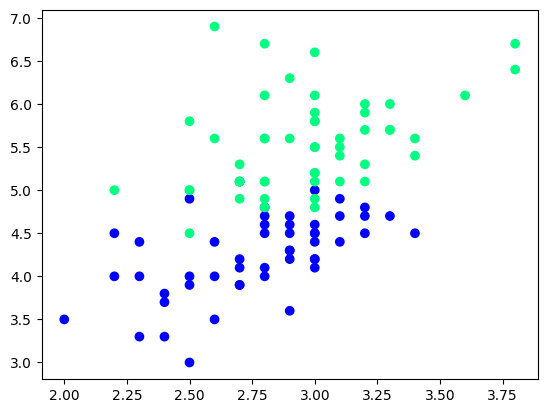

In [34]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [39]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [41]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [40]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

# Baggging

In [45]:
df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


In [51]:
df_bag_1 = DecisionTreeClassifier()

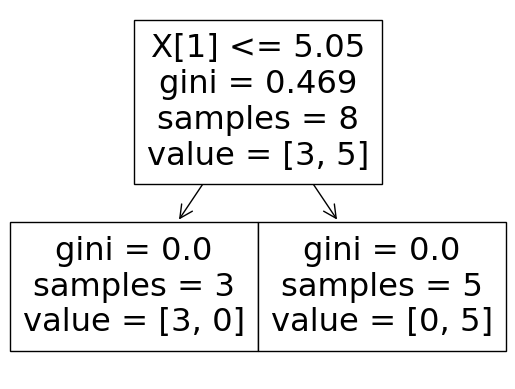

1.0


/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


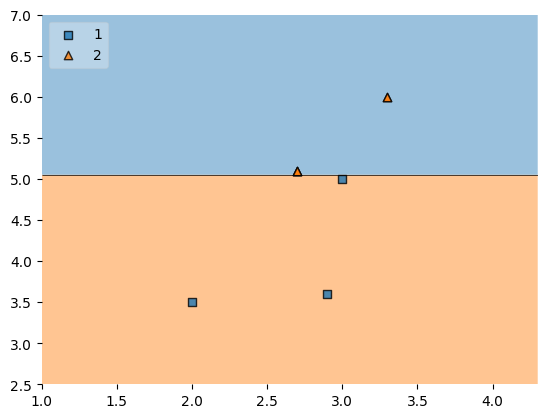

In [52]:
evaluate(df_bag_1,x,y)

In [53]:
 df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


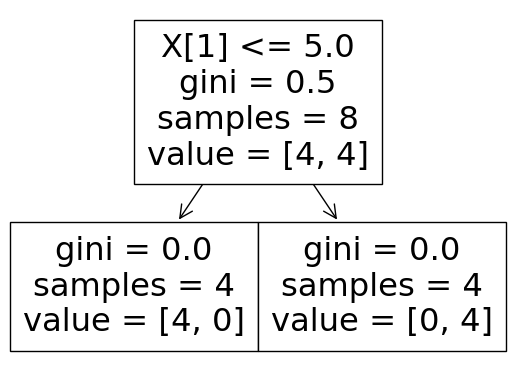

1.0


/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


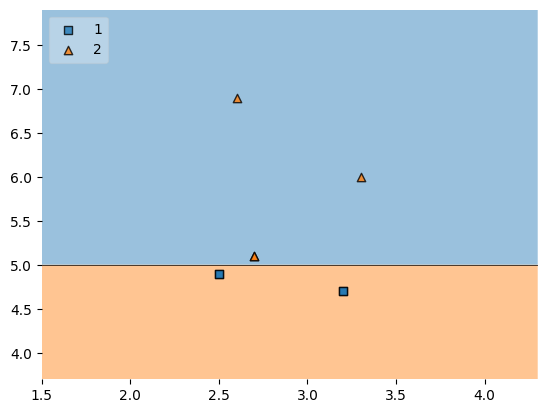

In [55]:
df_bag_2 = DecisionTreeClassifier()
evaluate(df_bag_2,x,y)

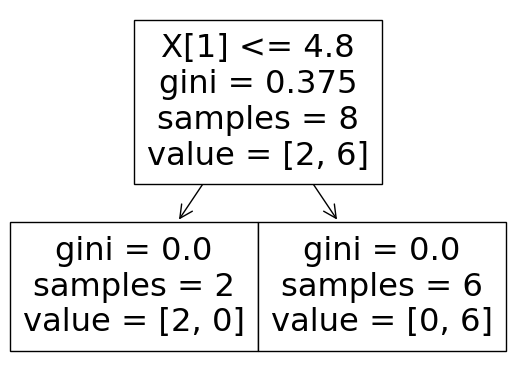

0.8


/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


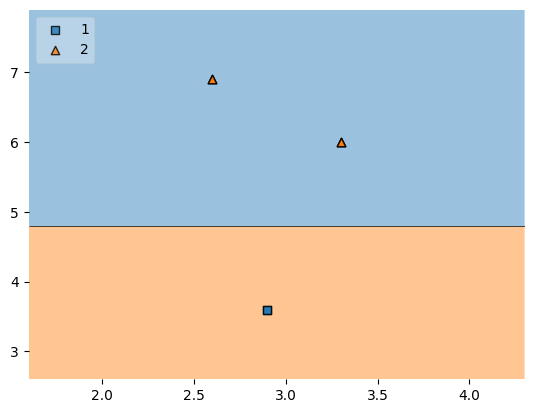

In [56]:
 df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag_3 = DecisionTreeClassifier()
evaluate(df_bag_3,x,y)

In [57]:
df_test

,sepal_width,petal_length,species
128,2.8,5.6,2
108,2.5,5.8,2
79,2.6,3.5,1
74,2.9,4.3,1
134,2.6,5.6,2


In [61]:
print('Prediction_1 : ', df_bag_1.predict(np.array([2.6,3.5]).reshape(1,2)))
print('Prediction_2 : ', df_bag_2.predict(np.array([2.6,3.5]).reshape(1,2)))
print('Prediction_3 : ', df_bag_3.predict(np.array([2.6,3.5]).reshape(1,2)))

Prediction_1 :  [1]
Prediction_2 :  [1]
Prediction_3 :  [1]


/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
